<h1 style="text-align:center;">Stroke Prediction</h1>
<p align="center">
  <img src="dataset-cover (1).jpg" width="400" height="300">
</p>

# Context

According to the World Health Organization (WHO), stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.

## Attribute Information

1. **id**: Unique identifier.
2. **gender**: Gender of the patient, can be "Male", "Female", or "Other".
3. **age**: Age of the patient.
4. **hypertension**: Indicates if the patient has hypertension, where 0 means the patient doesn't have hypertension, and 1 means the patient has hypertension.
5. **heart_disease**: Indicates if the patient has any heart diseases, where 0 means the patient doesn't have any heart diseases, and 1 means the patient has a heart disease.
6. **ever_married**: Indicates if the patient has ever been married, where "No" means the patient has never been married, and "Yes" means the patient has been married.
7. **work_type**: Type of work the patient is engaged in, which can be "children", "Govt_job", "Never_worked", "Private", or "Self-employed".
8. **Residence_type**: Type of residence of the patient, which can be "Rural" or "Urban".
9. **avg_glucose_level**: Average glucose level in the blood.
10. **bmi**: Body mass index.
11. **smoking_status**: Smoking status of the patient, which can be "formerly smoked", "never smoked", "smokes", or "Unknown" (if the information is unavailable for the patient).
12. **stroke**: Indicates if the patient had a stroke, where 1 means the patient had a stroke, and 0 means the patient did not have a stroke.


1. [Importing Libraries](#importing-libraries)
2. [Data Overview](#data-overview)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
5. [Data Encoding](#data-encoding)
6. [Data Scaling](#data-scaling)
7. [Data Modeling](#data-modeling)
8. [Model Evaluation](#model-evaluation)
9. [Pipeline](#pipeline)
10. [Deployment](#deployment)

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    🤗 Adding libraries
</div>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Reading the data
</div>

In [2]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
stroke.info() # to check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke.describe().T # to get a statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [5]:
stroke.describe(include='object').T # to get a statistical summary of the data

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Data Cleaning 
</div>

In [6]:
stroke.duplicated().sum() # to check for duplicate rows

0

In [7]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()
    
    # Percentage of missing values
    mis_val_percent =  df.isnull().sum() / len(df) * 100
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    
    # Print some summary information
    print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns
missing_values_table(stroke)

The dataset has 12 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
bmi,201,3.9


# Only 3.9% of missing data in the BMI column

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Checking the unique values 
</div>

In [8]:
for col in stroke.columns:
    print(col, stroke[col].unique())    

id [ 9046 51676 31112 ... 19723 37544 44679]
gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e

In [9]:
# Drop the id column   
stroke.drop('id', axis=1, inplace=True)
stroke.reset_index(drop=True, inplace=True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Handling the outliers of numerical columns 
</div>

In [10]:
from datasist.structdata import detect_outliers # to detect outliers in the numerical columns
outliers = detect_outliers(stroke,0,stroke[['age','avg_glucose_level','bmi']])
len(outliers) / len(stroke) * 100 # to check the percentage of outliers in the dataset

12.270058708414872

In [11]:
num_cols = ['age','avg_glucose_level','bmi']
cat_cols = ["hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status", "gender"]
num_cols, cat_cols

(['age', 'avg_glucose_level', 'bmi'],
 ['hypertension',
  'heart_disease',
  'ever_married',
  'work_type',
  'Residence_type',
  'smoking_status',
  'stroke',
  'gender'])

In [12]:
#  Calculate the IQR of the numerical columns, then replace the outliers with the lower and upper limits
for col in ['age','avg_glucose_level','bmi']:
    Q1 = stroke[col].quantile(0.25)
    Q3 = stroke[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    stroke[col] = np.where(stroke[col] > upper_limit, upper_limit, stroke[col])
    stroke[col] = np.where(stroke[col] < lower_limit, lower_limit, stroke[col])
stroke[['age','avg_glucose_level','bmi']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.0000
avg_glucose_level,5110.0,100.996204,33.214738,55.12,77.245,91.885,114.09,169.3575
bmi,4909.0,28.743512,7.336163,10.30,23.500,28.100,33.10,47.5000


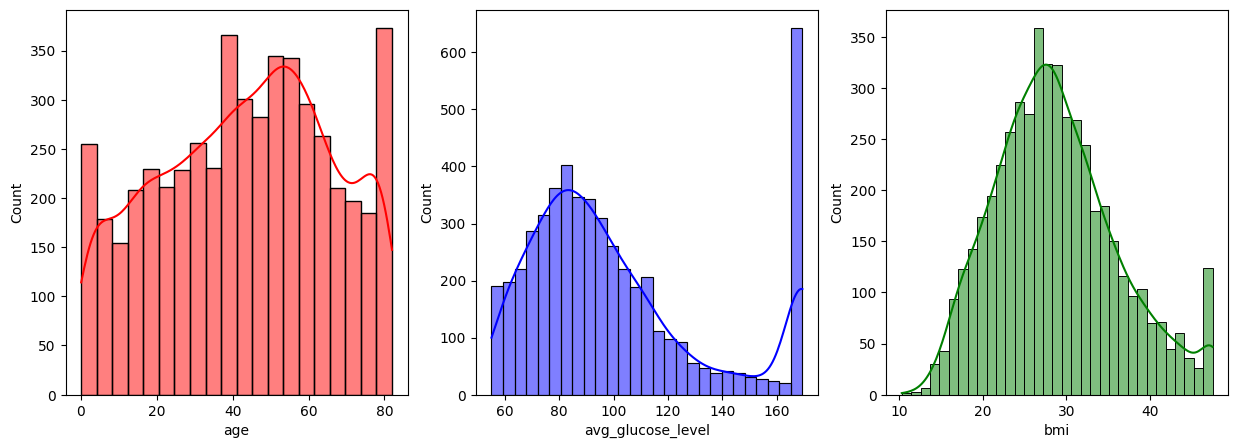

In [13]:
# Check for the distribution of the numerical columns
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(stroke['age'], kde=True, ax=ax[0], color='red')
sns.histplot(stroke['avg_glucose_level'], kde=True, ax=ax[1], color='blue')
sns.histplot(stroke['bmi'], kde=True, ax=ax[2], color='green')
plt.show()

In [14]:
px.box(stroke, x='age', title='Boxplot of Age ')

In [15]:
stroke["age"].mean(), stroke["age"].median(), stroke["age"].mode()

(43.226614481409,
 45.0,
 0    78.0
 Name: age, dtype: float64)

In [16]:
# How many people with age 0.08
stroke[stroke['age'] == 0.08]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [17]:
stroke[stroke['age'] < 1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [18]:
len(stroke[stroke['age'] < 1])

43

In [19]:
# Drop the rows with age less than 1
stroke = stroke[stroke['age'] > 1]
stroke.reset_index(drop=True, inplace=True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


In [20]:
# Take copy of the original dataset to build our Pipeline later
df = stroke.copy()
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked,1


In [21]:
# Check for the distribution of the numerical columns
ff.create_distplot([df['age']], group_labels=['age'], colors=['blue'],show_hist=False, show_rug=False)

In [22]:
stroke[["age",'avg_glucose_level','bmi']].describe().T    

,count,mean,std,min,25%,50%,75%,max
age,5062.0,43.631126,22.332880,1.08,26.000,45.00,61.00,82.0000
avg_glucose_level,5062.0,101.033997,33.256317,55.12,77.265,91.89,114.09,169.3575
bmi,4862.0,28.843871,7.291259,10.30,23.700,28.10,33.10,47.5000


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    EDA  
</div>

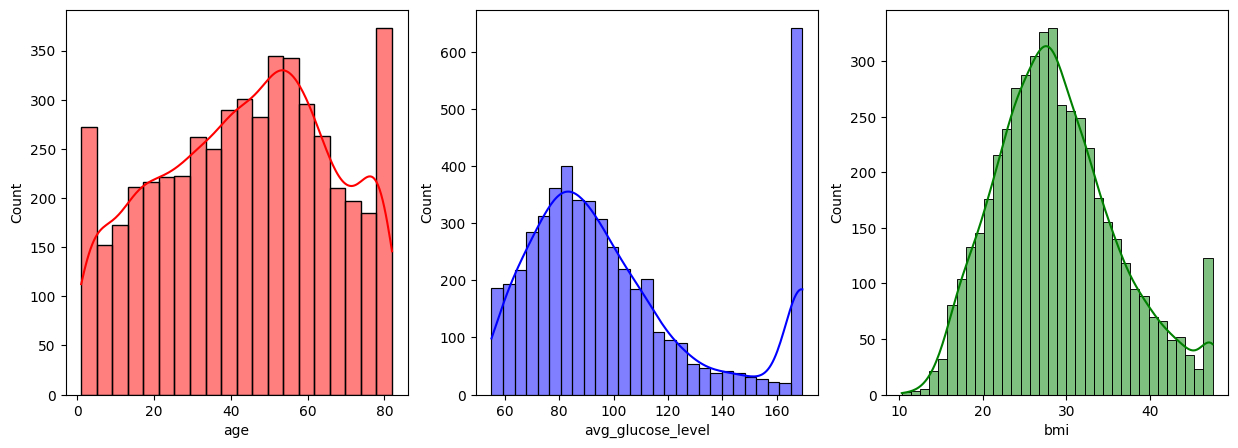

In [23]:
# Univariate Analysis of the numerical columns
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(stroke['age'], kde=True, ax=ax[0], color='red')
sns.histplot(stroke['avg_glucose_level'], kde=True, ax=ax[1], color='blue')
sns.histplot(stroke['bmi'], kde=True, ax=ax[2], color='green')
plt.show()

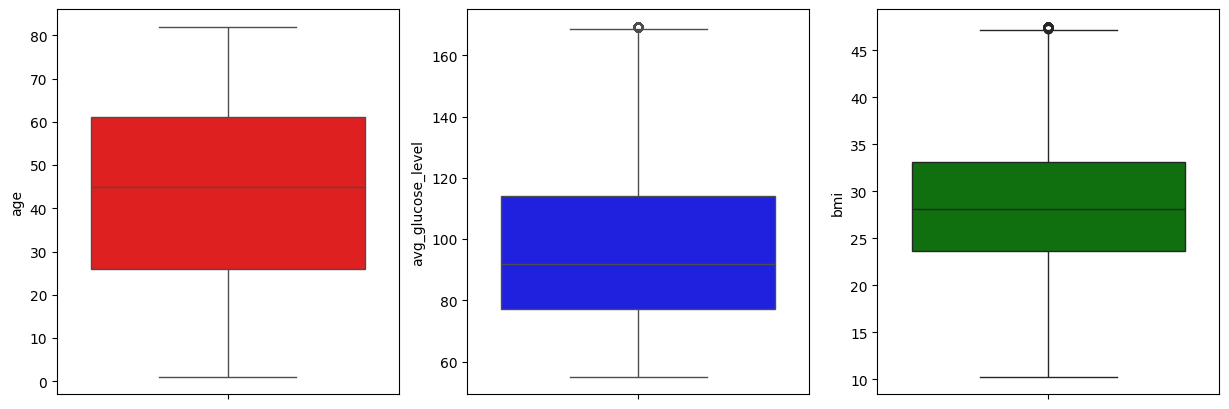

In [24]:
# Boxplot of the numerical columns
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(stroke['age'], ax=ax[0], color='red')
sns.boxplot(stroke['avg_glucose_level'], ax=ax[1], color='blue')
sns.boxplot(stroke['bmi'], ax=ax[2], color='green')
plt.show()

In [25]:
# Check for the distribution of the categorical columns
for col in cat_cols:
   fig =  px.histogram(stroke, x=col, title=f'Distribution of {col}', color=col, template='plotly_dark')
   fig.show()


In [26]:
for col in cat_cols:
    fig = px.pie(stroke, names=col, title=f'Distribution of {col}', hole=0.3, template='plotly_dark')   
    fig.show()


In [27]:
# Bi-variate Analysis of the numerical columns
fig = px.scatter(stroke, x='age', y='avg_glucose_level', color='stroke', template='plotly_dark')
fig.show()

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
    Hypothesis Testing  
</div>

In [28]:
# Age and Stroke
fig = px.box(stroke, x='stroke', y='age', color='stroke', template='plotly_dark')
fig.show()

In [29]:
# Test the hypothesis that the average age of people who had stroke is different from those who did not have stroke
from scipy.stats import ttest_ind
stroke_yes = stroke[stroke['stroke'] == 1]
stroke_no = stroke[stroke['stroke'] == 0]
t_test, p_value = ttest_ind(stroke_yes['age'], stroke_no['age'])
if p_value < 0.05:
    print('The average age of people who had stroke is different from those who did not have stroke')
else:
    print('The average age of people who had stroke is not different from those who did not have stroke')

The average age of people who had stroke is different from those who did not have stroke


In [30]:
# Hypertension, Heart Disease, and Stroke
fig = px.histogram(stroke, x='hypertension', color='stroke', barmode='group', template='plotly_dark')
fig.show()

In [31]:
#  Chi-square test of independence for each condition.
from scipy.stats import chi2_contingency
hypertension_stroke = pd.crosstab(stroke['hypertension'], stroke['stroke'])
heart_disease_stroke = pd.crosstab(stroke['heart_disease'], stroke['stroke'])
chi2, p_value, dof, expected = chi2_contingency(hypertension_stroke)
if p_value < 0.05:
    print('There is a relationship between hypertension and stroke')
else:
    print('There is no relationship between hypertension and stroke')

chi2, p_value, dof, expected = chi2_contingency(heart_disease_stroke)
if p_value < 0.05:
    print('There is a relationship between heart disease and stroke')
else:
    print('There is no relationship between heart disease and stroke')

There is a relationship between hypertension and stroke
There is a relationship between heart disease and stroke


In [32]:
# Do patients with stroke have significantly different average glucose levels compared to those without stroke?
t_test, p_value = ttest_ind(stroke_yes['avg_glucose_level'], stroke_no['avg_glucose_level'])
if p_value < 0.05:
    print('Patients with stroke have significantly different average glucose levels compared to those without stroke')
else:
    print('Patients with stroke do not have significantly different average glucose levels compared to those without stroke')
    

Patients with stroke have significantly different average glucose levels compared to those without stroke


In [33]:
# Do patients with stroke have significantly different average bmi compared to those without stroke?
t_test, p_value = ttest_ind(stroke_yes['bmi'], stroke_no['bmi'])
if p_value < 0.05:
    print('Patients with stroke have significantly different average bmi compared to those without stroke')
else:
    print('Patients with stroke do not have significantly different average bmi compared to those without stroke')
    

Patients with stroke do not have significantly different average bmi compared to those without stroke


In [34]:
# Categorical Variables (Marital Status, Work Type, Residence Type, Smoking Status)
# Is there a significant association between these categorical variables and stroke occurrence?
# Chi-square test of independence for each condition.
ever_married_stroke = pd.crosstab(stroke['ever_married'], stroke['stroke'])
work_type_stroke = pd.crosstab(stroke['work_type'], stroke['stroke'])
residence_type_stroke = pd.crosstab(stroke['Residence_type'], stroke['stroke'])
smoking_status_stroke = pd.crosstab(stroke['smoking_status'], stroke['stroke'])
gender_stroke = pd.crosstab(stroke['gender'], stroke['stroke'])

for var in stroke[['ever_married','work_type','Residence_type','smoking_status','gender']]:
    chi2, p_value, dof, expected = chi2_contingency(pd.crosstab(stroke[var], stroke['stroke']))
    if p_value < 0.05:
        print(f'There is a relationship between {var} and stroke')
    else:
        print(f'There is no relationship between {var} and stroke')

There is a relationship between ever_married and stroke
There is a relationship between work_type and stroke
There is no relationship between Residence_type and stroke
There is a relationship between smoking_status and stroke
There is no relationship between gender and stroke


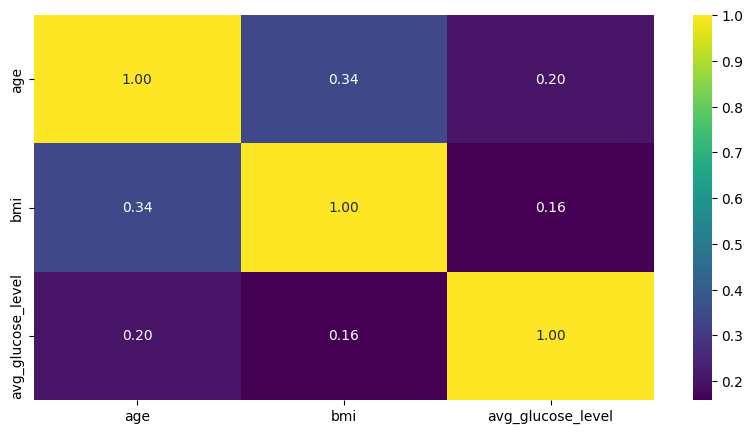

In [35]:
# Correlation Matrix    
plt.figure(figsize=(10,5))
sns.heatmap(stroke[["age", "bmi", 'avg_glucose_level']].corr(), annot=True, cmap='viridis', fmt='.2f')
plt.show()

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Splitting the data  
</div>

In [36]:
x = stroke.drop('stroke', axis=1)
y = stroke['stroke']

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   ML Pipeline  
</div>

In [37]:
missing_values_table(stroke)

The dataset has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
bmi,200,4.0


In [38]:
y.value_counts(normalize= True) * 100 # to check the class imbalance

stroke
0    95.080996
1     4.919004
Name: proportion, dtype: float64

In [39]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,169.3575,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,169.3575,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.9200,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,169.3575,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,169.3575,24.0,never smoked


In [40]:
num_cols = ['age','avg_glucose_level','bmi']
cat_cols = ["gender", "hypertension","heart_disease","ever_married","work_type","Residence_type","smoking_status"]

In [41]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from catboost import CatBoostClassifier
from imblearn.ensemble import RUSBoostClassifier
from sklearn.pipeline import Pipeline

In [42]:
num_pipeline = Pipeline([ ('imputer', KNNImputer(n_neighbors=5)), ('scaler', RobustScaler())])
num_pipeline

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

In [43]:
stroke["Residence_type"].value_counts()

Residence_type
Urban    2570
Rural    2492
Name: count, dtype: int64

In [44]:
stroke["work_type"].value_counts()  

work_type
Private          2925
Self-employed     819
Govt_job          657
children          639
Never_worked       22
Name: count, dtype: int64

In [45]:
stroke["smoking_status"].value_counts()

smoking_status
never smoked       1892
Unknown            1496
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [46]:
stroke["ever_married"].value_counts()

ever_married
Yes    3353
No     1709
Name: count, dtype: int64

In [47]:
cat_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy='most_frequent')),
                        ('encoder', OneHotEncoder(handle_unknown='ignore'))])
cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [48]:
preprocessor = ColumnTransformer([ ('num', num_pipeline, num_cols), ('cat', cat_pipeline, cat_cols)])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'hypertension', 'heart_disease',
                                  'ever_married', 'work_type', 'Residence_type',
                                  'smoking_status'])])

In [49]:
# Using Adasyn to handle the class imbalance    
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [50]:
# List of classifiers to iterate over
classifiers = [
    LogisticRegression(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    SVC(random_state=42),
    GaussianNB(),
    lgb.LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42, verbose=0),
    RUSBoostClassifier(random_state=42)
]

In [51]:
# Split the data into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
def classify_with_correct_pipeline(classifiers, x_train, x_test, y_train, y_test):
    results = []
    for classifier in classifiers:
        # Define the pipeline
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor), 
            ('smote', sm),
            ('classifier', classifier)
        ])
        
        # Fit the pipeline
        pipeline.fit(x_train, y_train)
        
        # Predict and evaluate
        y_pred = pipeline.predict(x_test)
        report = classification_report(y_test, y_pred)
        
        # Print the classification report
        print(f'{classifier.__class__.__name__} Classification Report:\n{report}\n')

# Prepare your data (x_train, x_test, y_train, y_test) as before
# classifiers list is defined as before
classify_with_correct_pipeline(classifiers, x_train, x_test, y_train, y_test)

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85       963
           1       0.12      0.66      0.21        50

    accuracy                           0.75      1013
   macro avg       0.55      0.71      0.53      1013
weighted avg       0.94      0.75      0.82      1013


KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91       963
           1       0.11      0.32      0.16        50

    accuracy                           0.83      1013
   macro avg       0.53      0.59      0.53      1013
weighted avg       0.92      0.83      0.87      1013


DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       963
           1       0.16      0.30      0.21        50

    accuracy                           0.89     

RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       963
           1       0.12      0.12      0.12        50

    accuracy                           0.91      1013
   macro avg       0.54      0.54      0.54      1013
weighted avg       0.91      0.91      0.91      1013


AdaBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88       963
           1       0.12      0.52      0.19        50

    accuracy                           0.78      1013
   macro avg       0.54      0.66      0.53      1013
weighted avg       0.93      0.78      0.84      1013


GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       963
           1       0.15      0.38      0.21        50

    accuracy                           0.8

In [53]:
# Combine SMOTE with Tomek Links for a balanced approach to handling imbalanced data
from imblearn.combine import SMOTETomek 

sampling_strategy = 0.5

smote_tomek = SMOTETomek(smote=SMOTE(sampling_strategy=sampling_strategy, random_state=42), random_state=42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
def classify_with_correct_pipeline(classifiers, x_train, x_test, y_train, y_test):
    results = []
    for classifier in classifiers:
        # Define the pipeline
        pipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor), 
            ('smote', smote_tomek),
            ('classifier', classifier)
        ])
        
        # Fit the pipeline
        pipeline.fit(x_train, y_train)
        
        # Predict and evaluate
        y_pred = pipeline.predict(x_test)
        report = classification_report(y_test, y_pred)
        
        # Print the classification report
        print(f'{classifier.__class__.__name__} Classification Report:\n{report}\n')

# Prepare your data (x_train, x_test, y_train, y_test) as before
# classifiers list is defined as before
classify_with_correct_pipeline(classifiers, x_train, x_test, y_train, y_test)

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       963
           1       0.15      0.54      0.23        50

    accuracy                           0.82      1013
   macro avg       0.56      0.69      0.56      1013
weighted avg       0.93      0.82      0.87      1013


KNeighborsClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       963
           1       0.11      0.28      0.16        50

    accuracy                           0.85      1013
   macro avg       0.53      0.58      0.54      1013
weighted avg       0.92      0.85      0.88      1013


DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       963
           1       0.14      0.24      0.17        50

    accuracy                           0.89     

In [55]:
# Let's try class weight in XGB classifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
xgb = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))
pipeline_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier', xgb)
])
pipeline_xgb.fit(x_train, y_train)
y_pred_xgb = pipeline_xgb.predict(x_test)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f'XGB Classifier Classification Report:\n{report_xgb}\n')



XGB Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       963
           1       0.16      0.14      0.15        50

    accuracy                           0.92      1013
   macro avg       0.56      0.55      0.55      1013
weighted avg       0.92      0.92      0.92      1013




In [56]:
# Optimize Sampling Strategy. Experiment with different sampling_strategy values for SMOTE.
sampling_strategies = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []
for strategy in sampling_strategies:
    smote = SMOTE(sampling_strategy=strategy, random_state=42)
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor), 
        ('smote', smote),
        ('classifier', CatBoostClassifier(random_state=42, verbose=0))
    ])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append(report['1'])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results)
results_df['sampling_strategy'] = sampling_strategies
results_df


,precision,recall,f1-score,support,sampling_strategy
0,0.166667,0.02,0.035714,50.0,0.1
1,0.181818,0.04,0.065574,50.0,0.2
2,0.235294,0.08,0.119403,50.0,0.3
3,0.235294,0.08,0.119403,50.0,0.4
4,0.136364,0.06,0.083333,50.0,0.5
5,0.193548,0.12,0.148148,50.0,0.6
6,0.166667,0.10,0.125000,50.0,0.7
7,0.184211,0.14,0.159091,50.0,0.8
8,0.225000,0.18,0.200000,50.0,0.9


The highest F1-score is observed with a sampling strategy of 0.9, which has an F1-score of 0.200. This suggests that increasing the proportion of minority class samples in the training set to 90% of the majority class provides the best balance between precision and recall among the strategies tested.

In [57]:
sampling_strategy = 0.9
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.96      0.97      0.96       963
           1       0.23      0.18      0.20        50

    accuracy                           0.93      1013
   macro avg       0.59      0.57      0.58      1013
weighted avg       0.92      0.93      0.93      1013



<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Features Importance  
</div>

In [74]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.9)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001AFC36FC2C0>)])

In [75]:
from sklearn.inspection import permutation_importance

# Fit the pipeline
pipeline.fit(x_train, y_train)

# Perform permutation importance
perm_importance = permutation_importance(pipeline, x_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame
data = {'importances_mean': perm_importance['importances_mean'], 
        'importances_std': perm_importance['importances_std']}

perm_importance_df = pd.DataFrame(data, index=x_test.columns)
perm_importance_df

,importances_mean,importances_std
gender,0.002567,0.002466
age,0.000592,0.005196
hypertension,-0.000823,0.002267
heart_disease,0.002139,0.001053
ever_married,-0.002797,0.002929
work_type,0.003225,0.003684
Residence_type,0.004179,0.002247
avg_glucose_level,0.001349,0.003199
bmi,-0.003751,0.004268
smoking_status,-0.006844,0.003586


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Hyperparameter tuning for CatBoost Classifier  
</div>

In [77]:
#  Hyperparameter tuning for CatBoost Classifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score, average_precision_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets with stratification
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


# Define the classifier with Randomized  Search for hyperparameter tuning

clf = CatBoostClassifier(random_state=42, verbose=0)
param_grid = {'classifier__depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10],
              'classifier__iterations': [250, 100, 500, 1000],
              'classifier__learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3],
              'classifier__l2_leaf_reg': [3,1,5,10,100],
              'classifier__border_count': [32,5,10,20,50,100,200],
              'classifier__thread_count': [4],
              'classifier__random_strength': [1,20,50,100,200],
              'classifier__bagging_temperature': [0.03,0.09,0.25,0.75],
              'classifier__random_strength': [0.1,0.5,0.9]
             }


# Choose a scoring function that fits the problem
scoring = {'AUC-PRC': make_scorer(average_precision_score), 'F1': make_scorer(f1_score)}

# Define the pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor), 
    ('smote', smote),
    ('classifier', clf)
])

# Apply RandomSearchCV for hyperparameter tuning and model selection
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, scoring=scoring, refit='AUC-PRC', cv=5, n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Best model prediction
y_pred = random_search.predict(x_test)

# Print the classification report of the best model
report = classification_report(y_test, y_pred)

# inspecting the best parameters and scores
print(report)
print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


              precision    recall  f1-score   support

           0       0.97      0.82      0.89       963
           1       0.14      0.56      0.23        50

    accuracy                           0.81      1013
   macro avg       0.56      0.69      0.56      1013
weighted avg       0.93      0.81      0.86      1013

{'classifier__thread_count': 4, 'classifier__random_strength': 0.9, 'classifier__learning_rate': 0.03, 'classifier__l2_leaf_reg': 1, 'classifier__iterations': 100, 'classifier__depth': 4, 'classifier__border_count': 10, 'classifier__bagging_temperature': 0.25}
0.11491409806398964


In [85]:
cat_pipeline = ImbPipeline(steps=[ ('preprocessor', preprocessor), 
                                  ('smote', smote),
                                ('classifier', CatBoostClassifier(random_state=42, verbose=0, thread_count=4, random_strength=0.9, learning_rate=0.03, l2_leaf_reg=1, iterations=100, depth=4, border_count=10, bagging_temperature=0.25))])
cat_pipeline.fit(x_train, y_train)                   

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.9)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001AFD0CCAF60>)])

In [86]:
# Stratified K fold and evaluate the model 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve

def stratified_kfold_evaluation(pipeline, x, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracy, precision, recall, f1, auc = [], [], [], [], []
    for train_idx, test_idx in skf.split(x, y):
        x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = x.iloc[test_idx], y.iloc[test_idx]
        pipeline.fit(x_train, y_train)
        y_pred = pipeline.predict(x_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, y_pred))
    return {'accuracy': np.mean(accuracy), 'precision': np.mean(precision), 'recall': np.mean(recall), 'f1': np.mean(f1), 'auc': np.mean(auc)}

stratified_kfold_evaluation(cat_pipeline, x, y, n_splits=5)

{'accuracy': 0.820423038054696,
 'precision': 0.1498350652877367,
 'recall': 0.5619591836734694,
 'f1': 0.23636970612371083,
 'auc': 0.6978717535887096}

In [87]:
y_pred = cat_pipeline.predict(x_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       963
           1       0.14      0.58      0.23        50

    accuracy                           0.81      1013
   macro avg       0.56      0.70      0.56      1013
weighted avg       0.93      0.81      0.86      1013



## Model Evaluation and Recommendations for Stroke Prediction Model

### Model Evaluation

- **Improvement in Recall for Class 1:** The recall for the stroke prediction class was successfully increased from 0.12 to 0.58. This is a significant improvement, indicating that the model is now better at identifying actual stroke cases, which is crucial for healthcare applications.

- **Precision-Recall Trade-off:** The improvement in recall came at the cost of precision, which decreased from 0.23 to 0.14. This trade-off is a common occurrence in machine learning, especially with imbalanced datasets. In the context of stroke prediction, prioritizing recall is essential since the cost of missing a stroke case is more critical than incorrectly predicting one.

- **Overall Accuracy:** The model's accuracy decreased from 0.94 to 0.81. In the face of class imbalance, overall accuracy becomes less critical compared to the model's ability to identify the minority class accurately.

- **F1 Score for Class 1:** The F1 score for class 1 has seen an improvement, indicating a better balance between precision and recall for predicting stroke cases. This improvement, though modest, is crucial for assessing the model's overall efficacy in handling class 1 predictions.

### Hyperparameter Tuning and Pipeline

- The strategy for hyperparameter tuning and pipeline construction, including the use of `RandomizedSearchCV` focusing on AUC-PRC and F1 scores, is well-considered. Employing SMOTE to address class imbalance by synthesizing new examples in the minority class is an effective choice.

### Recommendations

- **Feature Engineering:** Revisiting and potentially engineering new features from the existing dataset could significantly impact the model's performance. More informative features may enhance the model's predictive capability.

- **Alternative Models:** Although CatBoost has shown promise, exploring other models such as XGBoost, LightGBM, or ensemble methods might yield better performance.

- **Cost-sensitive Learning:** To further minimize false negatives, which are particularly critical in stroke prediction, consider applying cost-sensitive learning techniques that assign a higher cost to misclassifying the positive class.

- **Explainability:** For healthcare applications, understanding the rationale behind the model's predictions is vital. Integrating explainability tools like SHAP or LIME can provide insights into the model's decision-making process.

- **Continuous Monitoring:** The deployment of the model is merely the beginning. Continuous performance monitoring and model updates in response to new data or concept drift are essential for maintaining its efficacy over time.


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Cost sensitive learning 
</div>


In [95]:

clf = CatBoostClassifier(random_state=42, verbose=0, thread_count=4, random_strength=0.9,
                     learning_rate=0.03, l2_leaf_reg=1, iterations=100, depth=4, border_count=10, bagging_temperature=0.25)

param_grid = {
    'classifier__class_weights': [[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10]]
}

# Define the pipeline
pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                              ('smote', smote),
                              ('classifier', clf)])

# Scoring function that fits the problem
scoring = {'AUC-PRC': make_scorer(average_precision_score), 'F1': make_scorer(f1_score)}

# Apply RandomizedSearchCV for hyperparameter tuning and model selection
random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10,
                                   scoring=scoring, refit='AUC-PRC', cv=5, n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Best model prediction
y_pred = random_search.predict(x_test)

# Print the classification report of the best model
report = classification_report(y_test, y_pred)

# Inspecting the best parameters and scores
print(report)
print(random_search.best_params_)
print(random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       963
           1       0.14      0.56      0.23        50

    accuracy                           0.81      1013
   macro avg       0.56      0.69      0.56      1013
weighted avg       0.93      0.81      0.86      1013

{'classifier__class_weights': [1, 1]}
0.11491409806398964


<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Shap explainer 
</div>

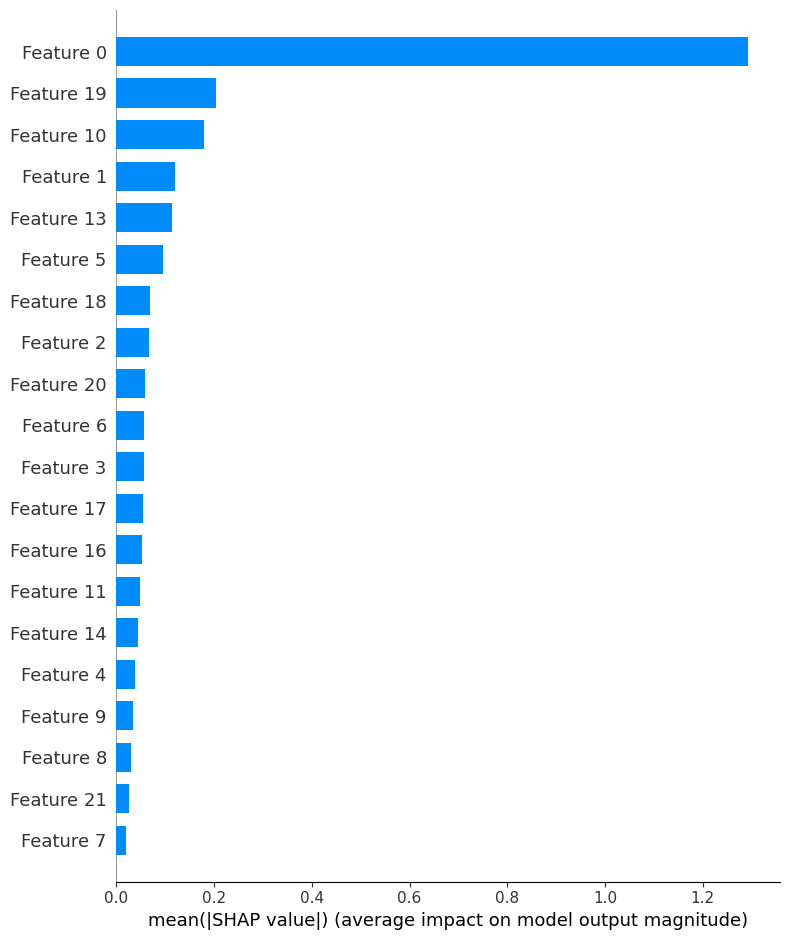

In [105]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve

# Assuming random_search.best_estimator_ gives you the best pipeline
best_pipeline = random_search.best_estimator_

# Extract the trained CatBoostClassifier from the pipeline
model = best_pipeline.named_steps['classifier']

# Initialize SHAP Explainer (using TreeExplainer as CatBoost is a tree-based model)
explainer = shap.TreeExplainer(model)

# Apply the preprocessor to transform the data
preprocessed_test_data = best_pipeline.named_steps['preprocessor'].transform(x_test)

# Compute SHAP values (this may take a bit)
shap_values = explainer.shap_values(preprocessed_test_data)

# Summarize the effects of all the features
shap.summary_plot(shap_values, preprocessed_test_data, plot_type="bar")


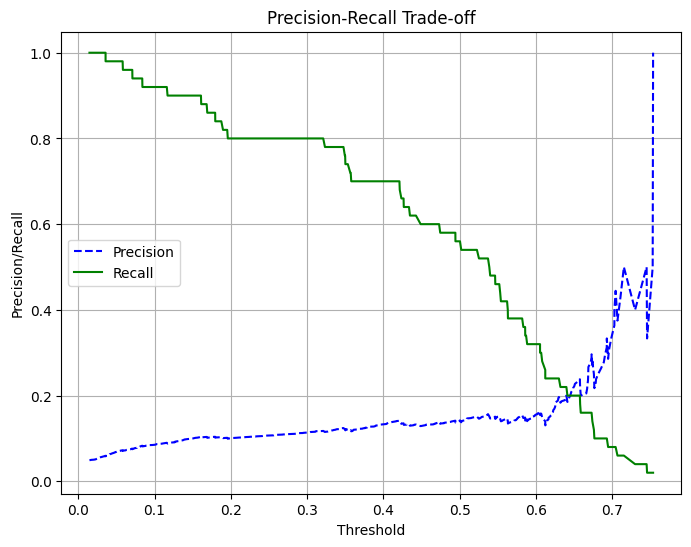

In [103]:
# Precision-Recall Trade-off
# Compute precision-recall pairs for different probability thresholds
y_scores = best_pipeline.predict_proba(x_test)[:, 1]  # Get the scores for the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall Trade-off")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [106]:
cat_pipeline = ImbPipeline(steps=[ ('preprocessor', preprocessor), 
                                  ('smote', smote),
                                ('classifier', CatBoostClassifier(random_state=42, verbose=0, thread_count=4, random_strength=0.9, learning_rate=0.03, l2_leaf_reg=1, iterations=100, depth=4, border_count=10, bagging_temperature=0.25))])
cat_pipeline.fit(x_train, y_train)        

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.9)),
                ('classifier',
                 <catboost.core.CatBoostClassifier object at 0x000001AFD2BDC290>)])

<div style="color:#F9F07A;
            font:bold 20px arial;
            padding:5px;
            background-color:#111;
            text-align:center;">
   Deployment 
</div>

In [107]:
# Save pipeline as pkl file
import joblib
joblib.dump(cat_pipeline, 'cat_pipeline.pkl')

['cat_pipeline.pkl']

In [112]:
# save the clean data as csv file 
df.to_csv('cleaned_stroke_data.csv', index=False)

In [115]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,5062.0,43.631126,22.332880,1.08,26.000,45.00,61.00,82.0000
avg_glucose_level,5062.0,101.033997,33.256317,55.12,77.265,91.89,114.09,169.3575
bmi,4862.0,28.843871,7.291259,10.30,23.700,28.10,33.10,47.5000


In [118]:
%%writefile model_deployment.py
# Importing Required Libraries
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import numpy as np
import warnings

def run():
    st.set_page_config(page_title="Stroke Prediction", page_icon="🧠", layout="wide")
    warnings.simplefilter(action='ignore', category=FutureWarning)

    select_page = st.sidebar.radio('Select page', ['Analysis', 'Model Classification', 'About'])

    if select_page == 'Analysis':
        cleaned_data = pd.read_csv('cleaned_stroke_data.csv')
        st.image('https://th.bing.com/th/id/OIP.nCkh1m-FQ0zwXAv0-9HY6QHaFi?rs=1&pid=ImgDetMain', width=700)
        st.write('### Head of Dataframe')
        st.dataframe(cleaned_data.head(10))

        # Create tabs for analysis
        tab1, tab2, tab3 = st.tabs(['Univariate Analysis', 'Bivariate Analysis', 'Multivariate Analysis'])

        # Univariate Analysis
        tab1.write('### Univariate Analysis with Histogram for each Feature')
        for col in cleaned_data.columns:
            tab1.plotly_chart(px.histogram(cleaned_data, x=col))

        # Bivariate Analysis
        tab2.write('### Numerical Features vs Target Variable')
        select_feature = tab2.selectbox('Select Feature', cleaned_data.columns.drop('stroke'))
        tab2.plotly_chart(px.box(cleaned_data, x='stroke', y=select_feature))

        # Multivariate Analysis - Heatmap for Numerical Columns Only
        tab3.write('### Correlation Heatmap for Numerical Features')
        numerical_cols = cleaned_data.select_dtypes(include=np.number).columns.tolist()
        corr_matrix = cleaned_data[numerical_cols].corr()
        tab3.plotly_chart(px.imshow(corr_matrix, text_auto=True))

    elif select_page == 'Model Classification':
        st.title('Stroke Prediction Model')
        st.image('stroke.jpg', width=700)

        # Load the model
        pipeline = joblib.load('cat_pipeline.pkl')

        # Input fields for model prediction
        gender = st.selectbox('Gender', ['Male', 'Female', 'Other'])
        age = st.slider('Age', 0, 100, 50)
        hypertension = st.selectbox('Hypertension', [0, 1])
        heart_disease = st.selectbox('Heart Disease', [0, 1])
        ever_married = st.selectbox('Ever Married', ['No', 'Yes'])
        work_type = st.selectbox('Work Type', ['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed'])
        Residence_type = st.selectbox('Residence Type', ['Rural', 'Urban'])
        avg_glucose_level = st.sidebar.slider('Average Glucose Level', 55, 170) 
        bmi = st.slider('BMI', 10.0, 50.0, 25.0)
        smoking_status = st.selectbox('Smoking Status', ['formerly smoked', 'never smoked', 'smokes', 'Unknown'])

        if st.button('Predict'):
            # Prepare the data for prediction
            data = {
                'gender': gender, 'age': age, 'hypertension': hypertension, 'heart_disease': heart_disease, 
                'ever_married': ever_married, 'work_type': work_type,
                'Residence_type': Residence_type, 'avg_glucose_level': avg_glucose_level, 'bmi': bmi,
                'smoking_status': smoking_status
            }
            df = pd.DataFrame([data])

            # Make prediction
            result = pipeline.predict(df)[0]

            # Display the prediction result
            if result == 1:
                st.error("Prediction: High risk of stroke.")
                st.markdown("""
                ### Health Advice
                If you're at high risk of stroke, it's crucial to consult with a healthcare provider for a detailed assessment and personalized advice. Here are some general recommendations:
                - Maintain a healthy diet rich in fruits, vegetables, and whole grains.
                - Exercise regularly.
                - Avoid smoking and limit alcohol consumption.
                - Regularly monitor and manage your blood pressure, cholesterol levels, and diabetes if applicable.
                """)
            else:
                st.success("Prediction: Low risk of stroke.")
                st.markdown("""
                ### Health Advice
                To maintain a low risk of stroke, consider the following general advice:
                - Continue eating a balanced diet.
                - Stay active and exercise regularly.
                - Keep a healthy lifestyle by avoiding smoking and limiting alcohol intake.
                - Regularly check your health indicators such as blood pressure and cholesterol levels.
                """)


        
    elif select_page == 'About':
        st.title('About Stroke Prediction')
        st.markdown("""
            ## Background and Problem Statement

            Stroke is a leading cause of death and disability worldwide. It occurs when the blood supply to part of the brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Early prediction and intervention can significantly reduce the impact of stroke.

            The goal of this project is to develop a predictive model that can identify individuals at high risk of stroke based on their medical and lifestyle factors. This can enable healthcare providers to offer timely intervention and potentially save lives.
    """)

    # At the bottom of every page
    st.image("Ibrahim.jpg", width=200)
    st.markdown("Done by Ibrahim Abdelnasar Yakout.")
    st.markdown("[LinkedIn](https://www.linkedin.com/in/ibrahim-abdelnasar/) | [Facebook](https://www.facebook.com/profile.php?id=100005030929252&mibextid=sCpJLy)")
if __name__ == '__main__':
    run()

Overwriting model_deployment.py


In [119]:
! streamlit run model_deployment.py

^C


In [120]:
! pipreqs ./

'pipreqs' is not recognized as an internal or external command,
operable program or batch file.


# Done by: Ibrahim Abdelnasar Yakout
